In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("drug200.csv")

In [5]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
data.shape

(200, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.select_dtypes('object').value_counts()

Sex  BP      Cholesterol  Drug 
F    HIGH    NORMAL       drugY    14
     NORMAL  HIGH         drugX    12
M    NORMAL  HIGH         drugY    11
     LOW     NORMAL       drugX    10
                          drugY     9
     HIGH    NORMAL       drugY     9
     NORMAL  NORMAL       drugX     9
     LOW     HIGH         drugC     9
F    HIGH    HIGH         drugY     9
M    LOW     HIGH         drugY     8
     HIGH    NORMAL       drugA     8
F    LOW     NORMAL       drugX     8
M    NORMAL  HIGH         drugX     8
F    NORMAL  NORMAL       drugX     7
     LOW     HIGH         drugC     7
                          drugY     7
             NORMAL       drugY     6
     HIGH    HIGH         drugA     6
M    HIGH    HIGH         drugA     6
F    NORMAL  HIGH         drugY     6
M    HIGH    HIGH         drugB     6
                          drugY     6
F    NORMAL  NORMAL       drugY     5
     HIGH    NORMAL       drugB     4
M    HIGH    NORMAL       drugB     4
F    HIGH    NORMA

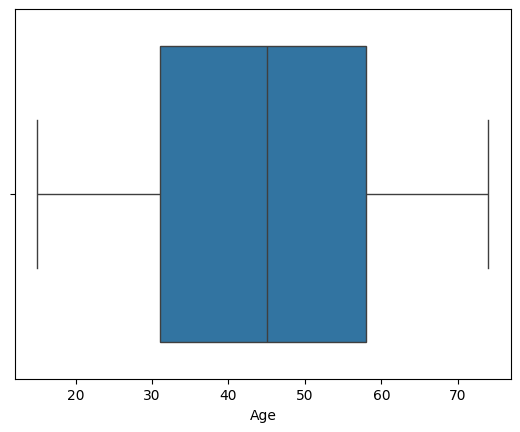

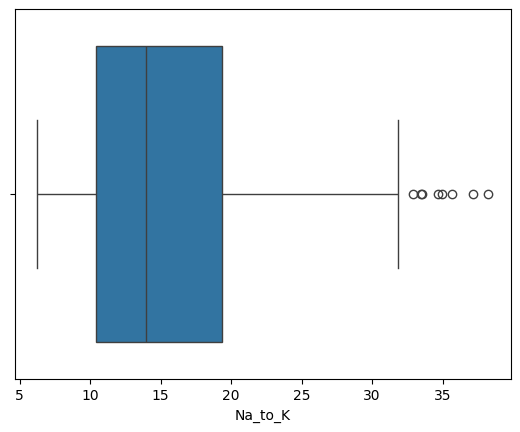

In [11]:
cat_col = data.select_dtypes('number').columns
for i in cat_col:
    sns.boxplot(data,x=i)
    plt.show()

In [12]:
data.Na_to_K = data.Na_to_K.clip(lower=data.Na_to_K.quantile(0.05),upper=data.Na_to_K.quantile(0.95))

<Axes: xlabel='Na_to_K'>

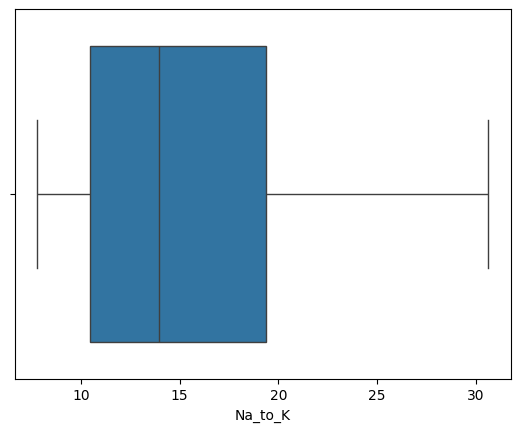

In [13]:
sns.boxplot(data,x=data.Na_to_K)

In [14]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

cat_col = []
for i in x.select_dtypes('object').columns:
    cat_col.append(i)
print(cat_col)
encoded_x = ohe.fit_transform(x[cat_col])
encoded_x

['Sex', 'BP', 'Cholesterol']


array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(200, 7))

In [16]:
x_encoder = pd.DataFrame(encoded_x, columns=ohe.get_feature_names_out(cat_col))
# x_encoder.index = x.index
x_encoder

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [17]:
concat_x = pd.concat([x,x_encoder],axis=1)
concat_x

,Age,Sex,BP,Cholesterol,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,F,HIGH,HIGH,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47,M,LOW,HIGH,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,47,M,LOW,HIGH,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,28,F,NORMAL,HIGH,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,61,F,LOW,HIGH,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,16,M,LOW,HIGH,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,52,M,NORMAL,HIGH,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,23,M,NORMAL,NORMAL,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [18]:
concat_x.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Sex_F', 'Sex_M',
       'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH',
       'Cholesterol_NORMAL'],
      dtype='object')

In [19]:
concat_x = concat_x[['Age', 'Na_to_K', 'Sex_F', 'Sex_M',
       'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH',
       'Cholesterol_NORMAL']]
concat_x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,47,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,61,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,16,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,52,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,23,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [20]:
count = 0
max_acc = 0.0
cm = 0
count_j = 0
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
# for i in range(101):
x_train,x_test,y_train,y_test = train_test_split(concat_x,y,test_size=0.20,random_state=98)
# for j in range(50):

from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)

y_pred = dc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred,average='micro')
acc = accuracy_score(y_test,y_pred)
print(cm)
# print(dc.score(x_test,y_test))
print(f"F1 Score is: {f1}")
print(f"Acuuracy score is: {acc}")
# acc = dc.score(x_test,y_test)

    # if acc > max_acc:
    #     max_acc = acc
    #     count = i
        # count_j = j
#         cm = cm
# print(f'Count is: {count},count of j: {count_j} accuracy is: {max_acc}, confusion matrix: {cm}')

[[ 0  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 14  1]
 [ 0  0  0  0 18]]
F1 Score is: 0.95
Acuuracy score is: 0.95


In [22]:
import pickle
model = r"Testing\decision_tree_classifier.pkl"
encoder = r'Testing\onehotencoder.pkl'
pickle.dump(dc, open(model,'wb'))
pickle.dump(ohe,open(encoder,'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'Testing\\decision_tree_classifier.pkl'